# Data Understanding

- **Nama:** [Vittorio Fiorentino]
- **Email:** [a541ybm493@devacademy.id]
- **ID Dicoding:** [A541YBM493]

## Objective:
- Prediksi Harga menggunakan Machine Learning

## Sumber Dataset:
https://www.kaggle.com/datasets/shivachandel/kc-house-data

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import os, shutil
import zipfile

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

## Load Dataset

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vittoriofiorentino","key":"15a94ea2c5322f4530e8dcb91a8b1d39"}'}

In [3]:
# Hapus jika .kaggle bukan folder
#if os.path.exists("/root/.kaggle") and not os.path.isdir("/root/.kaggle"):
#    os.remove("/root/.kaggle")

# Buat folder .kaggle dan pindahkan file
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Atur permission agar bisa diakses
os.chmod("/root/.kaggle/kaggle.json", 600)


In [4]:
!kaggle datasets download -d shivachandel/kc-house-data
!unzip kc-house-data.zip

Dataset URL: https://www.kaggle.com/datasets/shivachandel/kc-house-data
License(s): other
  0% 0.00/770k [00:00<?, ?B/s]
100% 770k/770k [00:00<00:00, 300MB/s]
Archive:  kc-house-data.zip
  inflating: kc_house_data.csv       


In [5]:
house = pd.read_csv('kc_house_data.csv')

house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


**Dataset House**

Dataset ini diambil dari kaggle yaitu kc_house_data.csv. Dataset berisi informasi mengenai spesifikasi properti beserta harga.



## EDA

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Struktur Data**

- Terdapat missing Value pada sqft_above dengan jumlah 21611 dari 21613
- Semua kolom bertipe Numeric (Kolom Date harusnya bertipe datetime)

**Insight**

- Kita akan berfokus pada beberapa kolom variabel saja, sehingga variable yang tidak perlu akan di drop.


Penjelasan 21 Fitur Awal:
1. id
- ID unik untuk setiap properti. Digunakan sebagai identifikasi individual dalam dataset.

2. date
- Tanggal penjualan rumah. Format umum: YYYYMMDDT000000.

3. price
- Harga jual rumah (dalam USD). Ini adalah variabel target jika ingin melakukan prediksi harga.

4. bedrooms
- Jumlah kamar tidur di rumah.

5. bathrooms
- Jumlah kamar mandi (dinyatakan dalam angka desimal; misal 1.5 berarti 1 kamar mandi penuh dan 1 kamar mandi kecil).

6. sqft_living
- Luas area yang dapat dihuni (livable) dalam satuan kaki persegi.

7. sqft_lot
- Luas total tanah properti (termasuk bangunan dan halaman), dalam kaki persegi.

8. floors
- Jumlah lantai bangunan rumah.

9. waterfront
- Indikator apakah rumah memiliki pemandangan langsung ke air (danau, laut, dll).
-  Nilai: 0 (tidak), 1 (ya).

10. view
- Indeks visualisasi rumah terhadap pemandangan luar. Skala 0–4; semakin tinggi, semakin bagus pandangan rumah.

11. condition
- Kondisi umum rumah (bukan renovasi). Skala 1–5; 1 paling buruk, 5 sangat baik.

12. grade
- Penilaian kualitas konstruksi dan desain rumah oleh King County (bukan kondisi). Skala 1–13.

13. sqft_above
- Luas area bangunan di atas tanah (tidak termasuk basement), dalam kaki persegi.

14. sqft_basement
- Luas area basement (bawah tanah), dalam kaki persegi.

15. yr_built
- Tahun rumah pertama kali dibangun.

16. yr_renovated
- Tahun terakhir rumah direnovasi. Jika tidak pernah direnovasi, bernilai 0.

17. zipcode
- Kode pos wilayah rumah berada.

18. lat
- Latitude (garis lintang) lokasi properti.

19. long
- Longitude (garis bujur) lokasi properti.

20. sqft_living15
- Rata-rata luas area livable dari 15 rumah tetangga terdekat.

21. sqft_lot15
- Rata-rata luas tanah dari 15 rumah tetangga terdekat.

### Handling Missing Value

Pada code dibawah menunjukkan ada missing value pada kolom sqft_above

In [7]:
house.isna().sum()


,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [8]:
house = house.dropna(subset=['sqft_above'])

### Perkecil Scope Variable Dataset

- Hal ini bertujuan untuk menyederhanakan model dan menghindari overfitting.
- Beberapa variabel yang dirasa tidak terlalu berpengaruh dengan signifikan akan di drop. Sehingga kita hanya mengambil variabel ( price, bedrooms, bathrooms, sqft_living, floors, waterfront, condition, grade, yr_built, yr_renovated)

In [9]:
house = house.drop(['id', 'date', 'zipcode', 'view', 'lat', 'long', 'sqft_basement', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_living15'], axis=1)


In [10]:
house.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,1.0,0,3,7,1955,0
1,538000.0,3,2.25,2570,2.0,0,3,7,1951,1991
2,180000.0,2,1.00,770,1.0,0,3,6,1933,0
3,604000.0,4,3.00,1960,1.0,0,5,7,1965,0
4,510000.0,3,2.00,1680,1.0,0,3,8,1987,0


In [11]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
count,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,5.400850e+05,3.370830,2.114791,2079.853454,1.494332,0.007542,3.409421,7.656888,1971.007959,84.410069
std,3.671430e+05,0.930092,0.770157,918.422406,0.540003,0.086521,0.650755,1.175502,29.372358,401.697007
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,1.000000,1.000000,1900.000000,0.000000
25%,3.217250e+05,3.000000,1.750000,1426.000000,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,5.000000,13.000000,2015.000000,2015.000000


**Insight:**

- Kolom bedrooms dan bathrooms memiliki data bernilai 0. Sedikit ambigu jika rumah tidak punya bedrooms dan bathrooms. Tapi bisa saja memang ada. Kita berspekulasi bahwa nilai 0 itu tidak mungkin, sehingga akan kita buang.

### Handling Nilai 0 Pada Bedroom dan Bathrooms

In [12]:
bedrooms = (house.bedrooms == 0).sum()
print(bedrooms)

13


Bedrooms yang bernilai 0 memiliki 13 baris.

In [13]:
house.loc[(house['bedrooms']==0)]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
875,1095000.0,0,0.00,3064,3.5,0,3,7,1990,0
3119,380000.0,0,0.00,1470,3.0,0,3,8,2006,0
3467,288000.0,0,1.50,1430,3.0,0,3,7,1999,0
4868,228000.0,0,1.00,390,1.0,0,2,4,1953,0
6994,1295650.0,0,0.00,4810,2.0,0,3,12,1990,0
8477,339950.0,0,2.50,2290,2.0,0,3,8,1985,0
8484,240000.0,0,2.50,1810,2.0,0,3,7,2003,0
9773,355000.0,0,0.00,2460,2.0,0,3,8,1990,0
9854,235000.0,0,0.00,1470,2.0,0,3,7,1996,0
12653,320000.0,0,2.50,1490,2.0,0,3,7,1999,0


Dari hasil ini bisa dilihat memang anomali karena grade rumah termasuk mayoritas tinggi. Sehingga data ini akan dibuang/drop

In [14]:
bathrooms = (house.bathrooms == 0).sum()
print(bathrooms)

10


Bathrooms yang bernilai 0 memiliki 3 baris

In [15]:
house.loc[(house['bathrooms']==0)]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
875,1095000.0,0,0.0,3064,3.5,0,3,7,1990,0
1149,75000.0,1,0.0,670,1.0,0,3,3,1966,0
3119,380000.0,0,0.0,1470,3.0,0,3,8,2006,0
5832,280000.0,1,0.0,600,1.0,0,2,3,1950,0
6994,1295650.0,0,0.0,4810,2.0,0,3,12,1990,0
9773,355000.0,0,0.0,2460,2.0,0,3,8,1990,0
9854,235000.0,0,0.0,1470,2.0,0,3,7,1996,0
10481,484000.0,1,0.0,690,1.0,0,4,7,1948,0
14423,139950.0,0,0.0,844,1.0,0,4,7,1913,0
19452,142000.0,0,0.0,290,1.0,0,1,1,1963,0


Dari hasil ini bisa dilihat meskipun bathrooms, tetapi masih ada bedrooms. Jika dilihat dari yr_built kisaran 1948-1966 yang dimana termasuk sudah tua dengan grade yang normal.

- Dapat disimpulkan data ini termasuk normal, sehingga tetap akan digunakan

### Handling Outliers

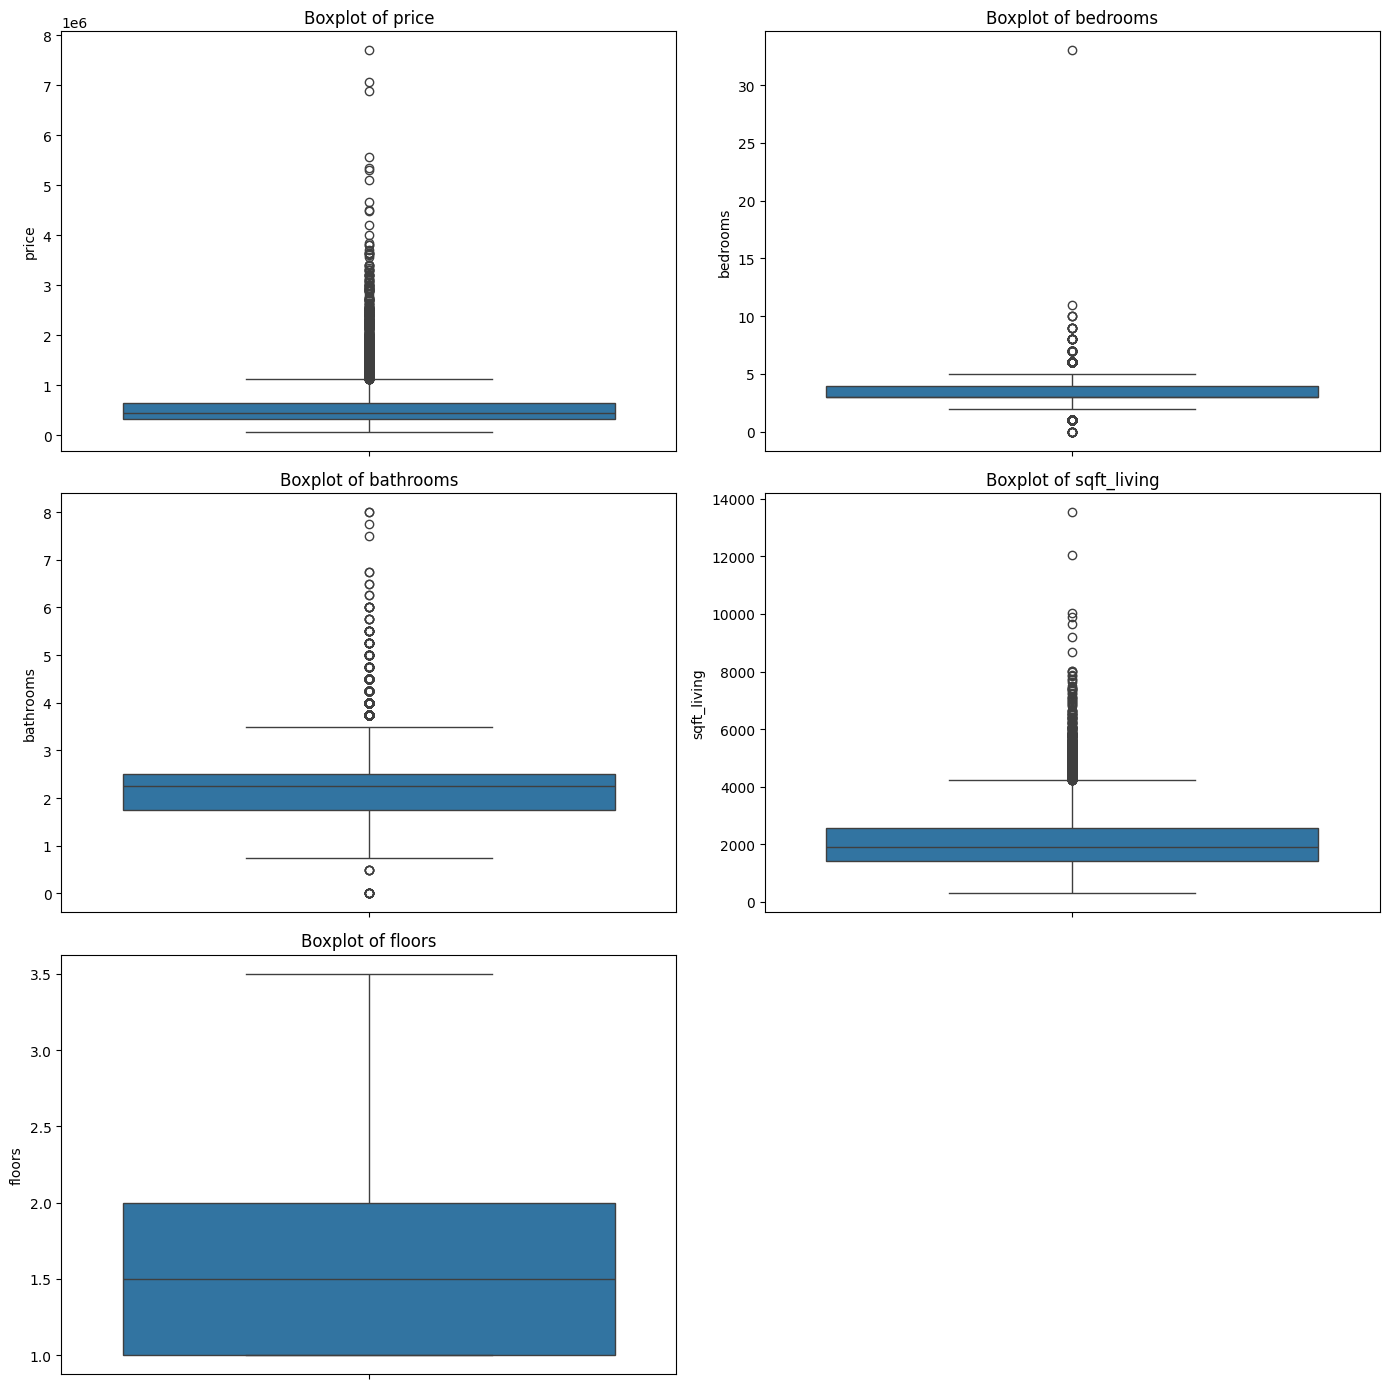

In [16]:
numerical_cols = ['price','bedrooms','bathrooms','sqft_living','floors']

plt.figure(figsize=(14, 14))  # lebih lebar
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=house[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Penjelasan BoxPlot:

1. bathrooms
Boxplot: Terlihat banyak outlier di atas (hingga 8 kamar mandi). Rumah dengan lebih dari 4–5 kamar mandi itu jarang dan bisa dikategorikan outlier.

2. sqft_living
Boxplot: Outlier ekstrem sangat banyak di sisi atas (hingga >13.000 sqft). Rumah dengan luas >8000 sqft adalah mansion dan sangat tidak umum, bisa mendistorsi model.

3. floors
Boxplot: Hampir tidak ada outlier. Rentang antara 1 hingga 3.5 lantai, distribusinya cukup stabil.

4.  bedrooms
Boxplot: Outlier bisa terjadi untuk rumah dengan 33 kamar tidur.

5. price
Boxplot: Harga memang ada outliers. Mungkin karena ada rumah mahal/mansion

# Data Preparation

## Drop nilai 0 pada Bedrooms

In [17]:
# Drop baris dengan nilai 'Bedrooms' = 0
house = house.loc[(house[['bedrooms']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
house.shape

(21598, 10)

#### Handling Outliers dengan Winsorize

Winsorize adalah teknik statistik yang digunakan untuk mengurangi pengaruh outlier ekstrem dalam data dengan cara mengubah (bukan menghapus) nilai-nilai ekstrem tersebut menjadi nilai yang lebih dekat ke nilai tengah (biasanya batas persentil tertentu).

In [18]:
def winsorize_iqr_df(house, columns):
    house_winsorized = house.copy()  # salin dataframe supaya data asli aman

    for col in columns:
        Q1 = house[col].quantile(0.25)
        Q3 = house[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        house_winsorized[col] = np.where(
            house_winsorized[col] < lower_bound, lower_bound,
            np.where(house_winsorized[col] > upper_bound, upper_bound, house_winsorized[col])
        )

    return house_winsorized

# Misalnya kolom yang mau di-winsorize:
num_cols = ['bathrooms', 'sqft_living', 'bedrooms']

# Terapkan winsorization ke dataframe house
house_winsorized = winsorize_iqr_df(house, num_cols)



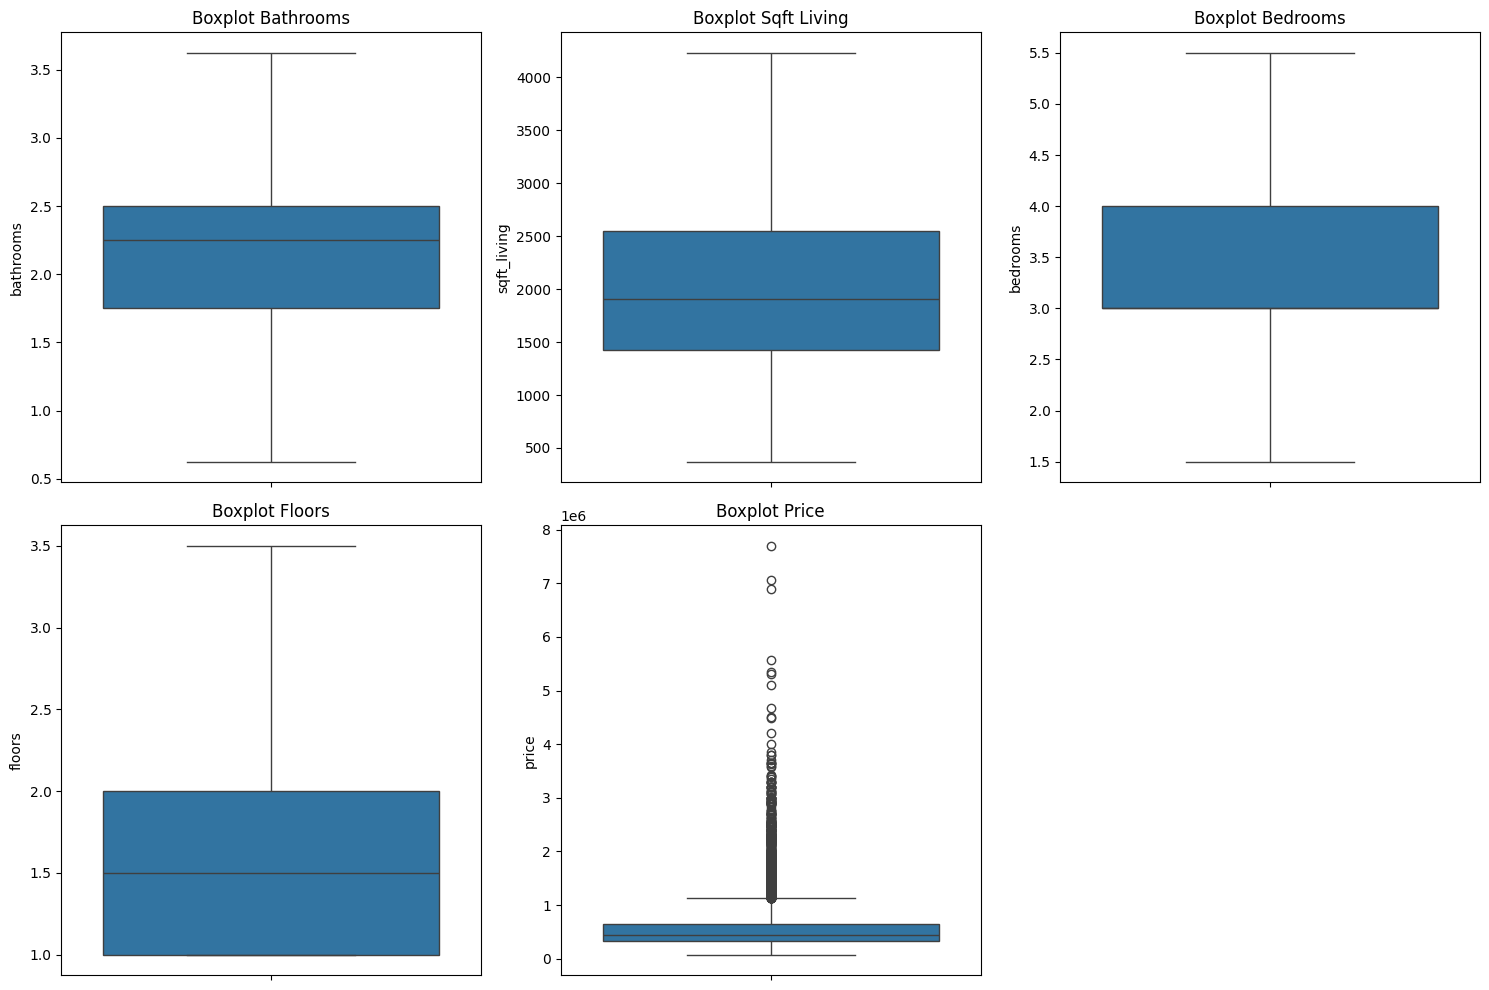

In [19]:
plt.figure(figsize=(15, 10))  # ukuran lebih besar agar tidak sempit

# Boxplot bathrooms
plt.subplot(2, 3, 1)
sns.boxplot(y=house_winsorized['bathrooms'])
plt.title('Boxplot Bathrooms')

# Boxplot sqft_living
plt.subplot(2, 3, 2)
sns.boxplot(y=house_winsorized['sqft_living'])
plt.title('Boxplot Sqft Living')

# Boxplot bedrooms
plt.subplot(2, 3, 3)
sns.boxplot(y=house_winsorized['bedrooms'])
plt.title('Boxplot Bedrooms')

# Boxplot floors
plt.subplot(2, 3, 4)
sns.boxplot(y=house_winsorized['floors'])
plt.title('Boxplot Floors')

# Boxplot price
plt.subplot(2, 3, 5)
sns.boxplot(y=house_winsorized['price'])
plt.title('Boxplot Price')

plt.tight_layout()
plt.show()


**Penjelasan**:

Setelah berhasil menangani outlier dengan winsorize, data sudah stabil. Variabel price merupakan nilai target jadi tetap dibiarkan meskipun ada outlier karena akan mempengaruhi akurasi model. Model justru perlu belajar bahwa properti tertentu memang bisa mahal.

In [20]:
house_winsorized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21598 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21598 non-null  float64
 1   bedrooms      21598 non-null  float64
 2   bathrooms     21598 non-null  float64
 3   sqft_living   21598 non-null  float64
 4   floors        21598 non-null  float64
 5   waterfront    21598 non-null  int64  
 6   condition     21598 non-null  int64  
 7   grade         21598 non-null  int64  
 8   yr_built      21598 non-null  int64  
 9   yr_renovated  21598 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.8 MB


In [21]:
house_winsorized.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
count,2.159800e+04,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000
mean,5.401636e+05,3.363899,2.099072,2058.237944,1.494050,0.007547,3.409760,7.657468,1971.000232,84.460876
std,3.671422e+05,0.853163,0.721622,838.968054,0.539691,0.086547,0.650601,1.174026,29.372926,401.812546
min,7.500000e+04,1.500000,0.625000,370.000000,1.000000,0.000000,1.000000,3.000000,1900.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1427.750000,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000
max,7.700000e+06,5.500000,3.625000,4233.375000,3.500000,1.000000,5.000000,13.000000,2015.000000,2015.000000


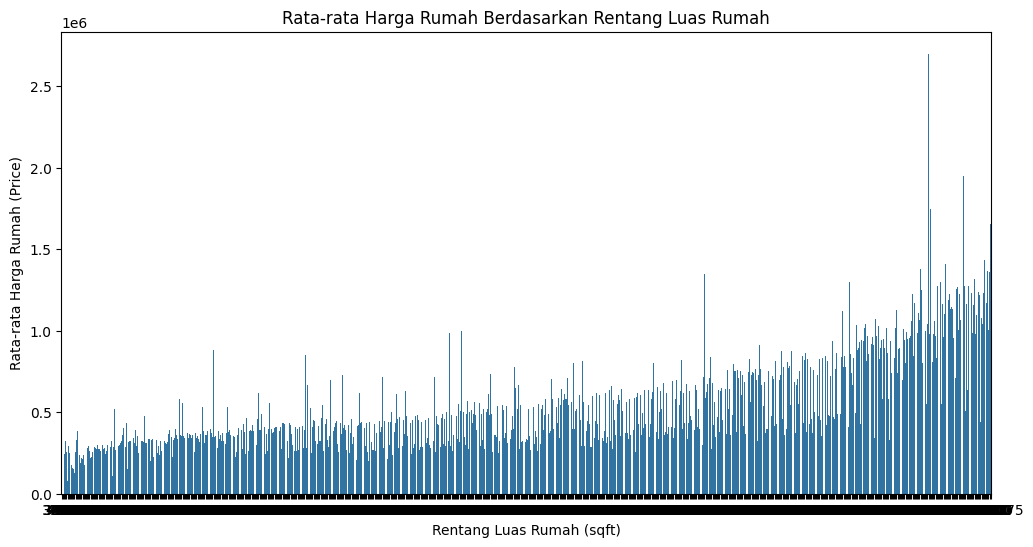

In [22]:
# Membuat kategori bins untuk sqft_living

# Agregasi rata-rata harga berdasarkan kategori luas rumah
df_agg = house_winsorized.groupby('sqft_living').agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(12,6))
plt.title("Rata-rata Harga Rumah Berdasarkan Rentang Luas Rumah")
sns.barplot(x='sqft_living', y='price', data=df_agg)
plt.xlabel("Rentang Luas Rumah (sqft)")
plt.ylabel("Rata-rata Harga Rumah (Price)")
plt.show()

Berdasarkan hasil visualisasi, berikut adalah beberapa insight yang bisa didapatkan:

- Distribusi Harga Jual Berdasarkan Luas Rumah: Bar chart menunjukkan harga jual ('selling_price') untuk berbagai kategori luas rumah ('sqft_living'). Sumbu X adalah luas rumah dan sumbu Y adalah harga jual.

- Kategori dengan Harga Jual Terendah: Range 0-1000

- Kategori dengan Harga Jual Tertinggi: Range 4001+

- Tren Peningkatan Harga Jual: Terlihat jelas ada tren peningkatan harga jual dari kiri ke kanan.


### Univariate Analysis

- Analisis Satu Variabel
- Tidak mempelajari hubungan dengan variabel lain

In [23]:
numerical_features = ['price', 'bathrooms', 'bedrooms', 'floors', 'sqft_living', 'yr_built', 'yr_renovated']
categorical_features = ['waterfront', 'condition', 'grade']

#### Categorical Features


Distribusi untuk fitur: waterfront
            jumlah sampel  persentase
waterfront                           
0                   21435        99.2
1                     163         0.8


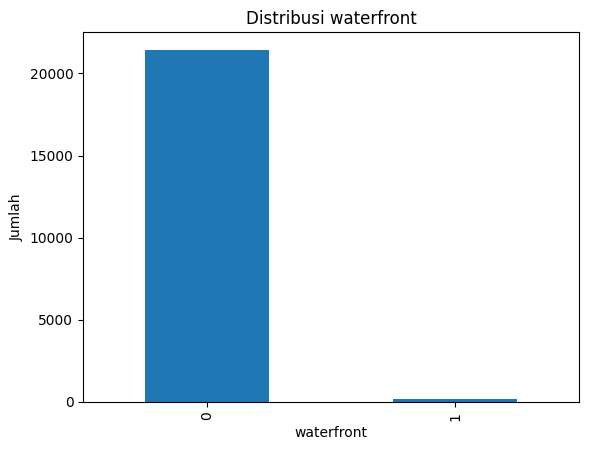


Distribusi untuk fitur: condition
           jumlah sampel  persentase
condition                           
3                  14020        64.9
4                   5677        26.3
5                   1701         7.9
2                    171         0.8
1                     29         0.1


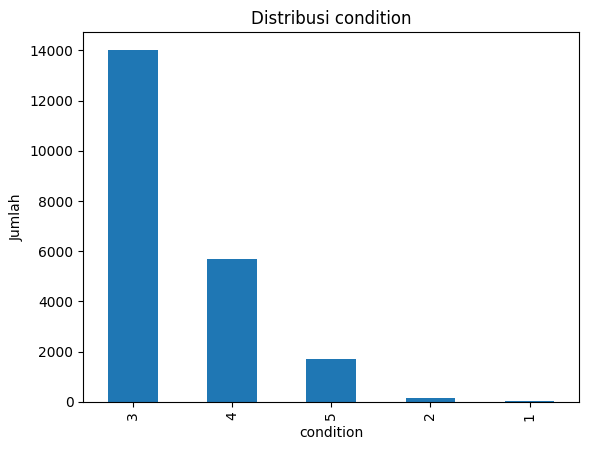


Distribusi untuk fitur: grade
       jumlah sampel  persentase
grade                           
7               8974        41.6
8               6064        28.1
9               2615        12.1
6               2038         9.4
10              1134         5.3
11               399         1.8
5                242         1.1
12                89         0.4
4                 27         0.1
13                13         0.1
3                  3         0.0


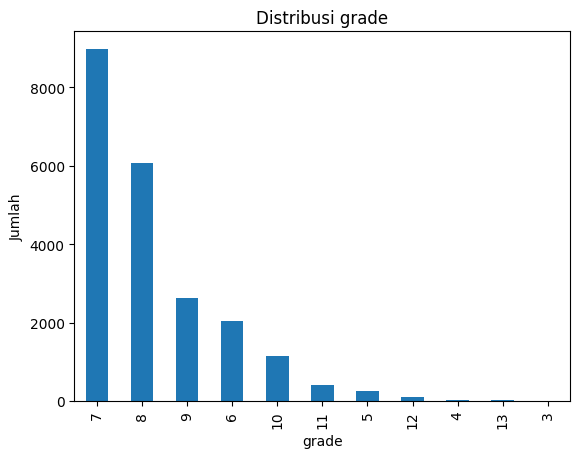

In [24]:
for feature in categorical_features:
    count = house_winsorized[feature].value_counts()
    percent = 100 * house_winsorized[feature].value_counts(normalize=True)
    df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})

    print(f"\nDistribusi untuk fitur: {feature}")
    print(df)

    count.plot(kind='bar', title=f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.show()


#### Numerical Features

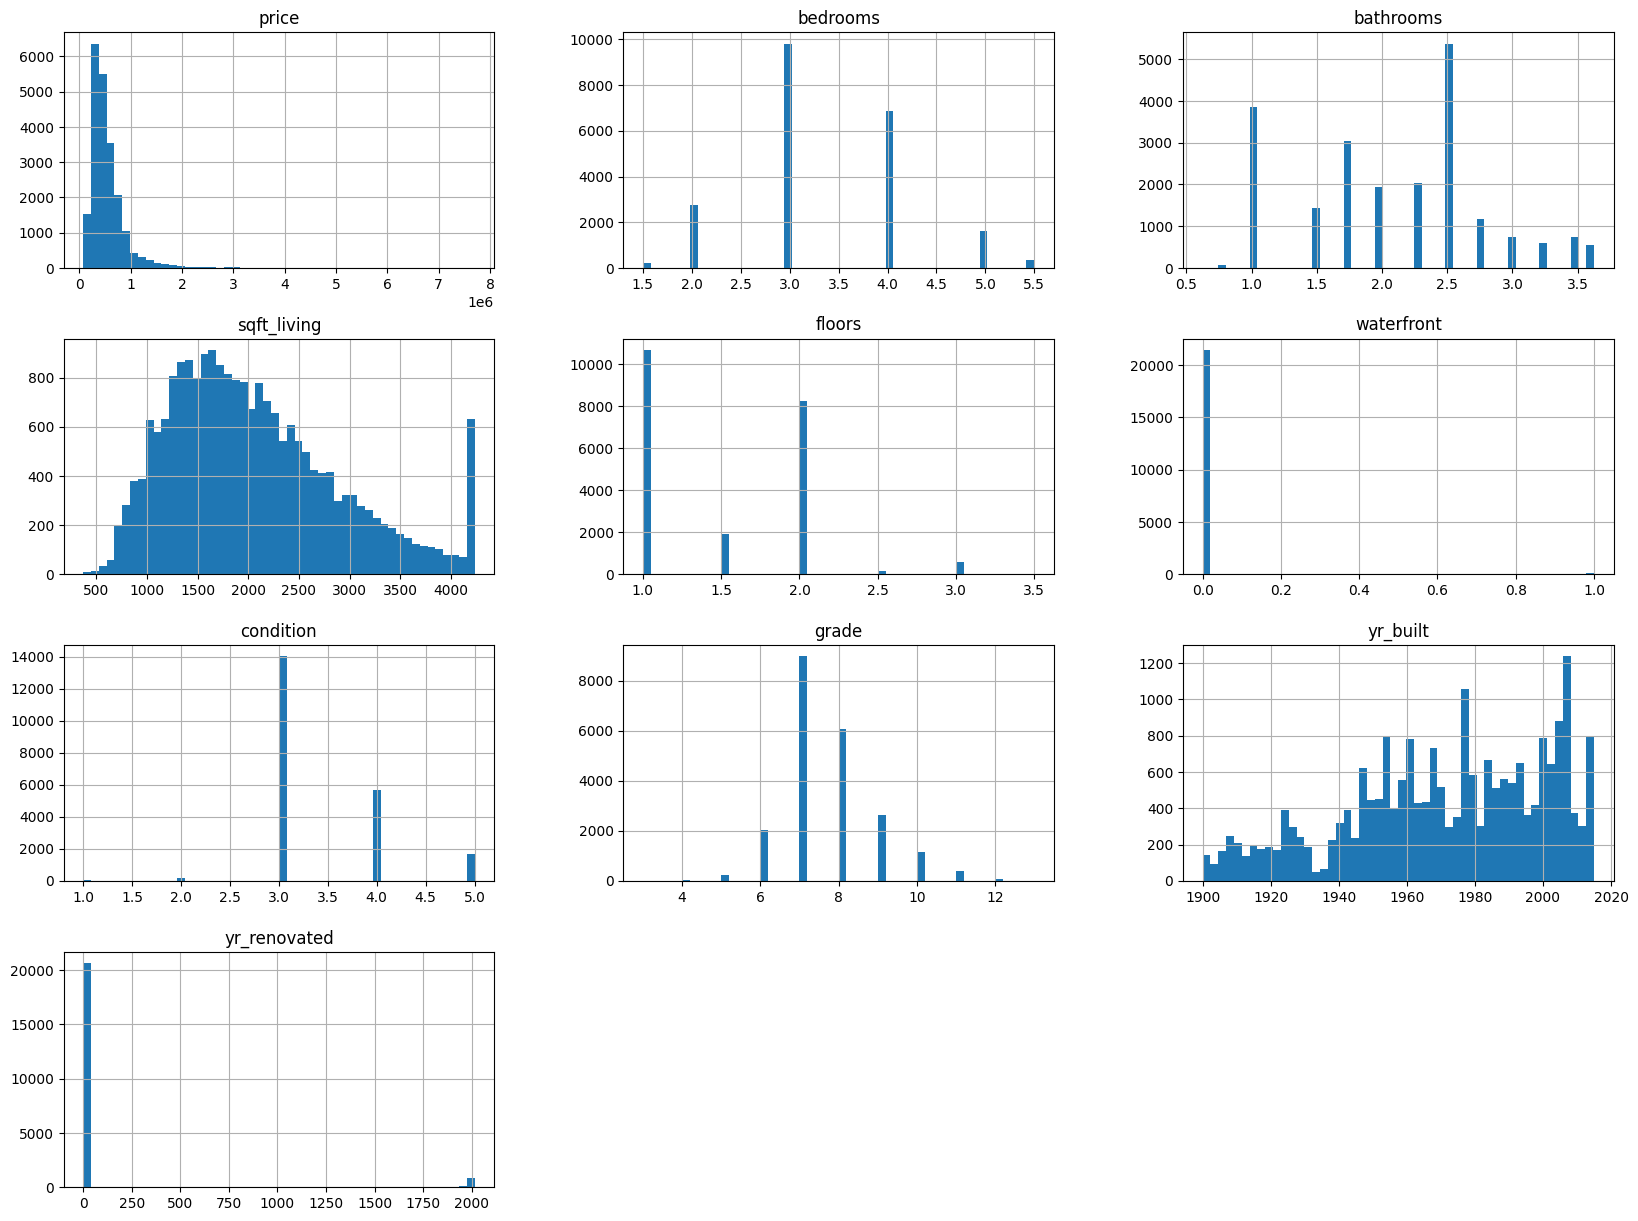

In [25]:
house_winsorized.hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis

- Analisis Banyak Variabel
- Digunakan untuk menemukan hubungan, korelasi, atau pengaruh antar variabel.

#### Categorical Features

<ipython-input-26-2ccb4fb43388>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=2.5,
<ipython-input-26-2ccb4fb43388>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=2.5,
<ipython-input-26-2ccb4fb43388>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=2.5,


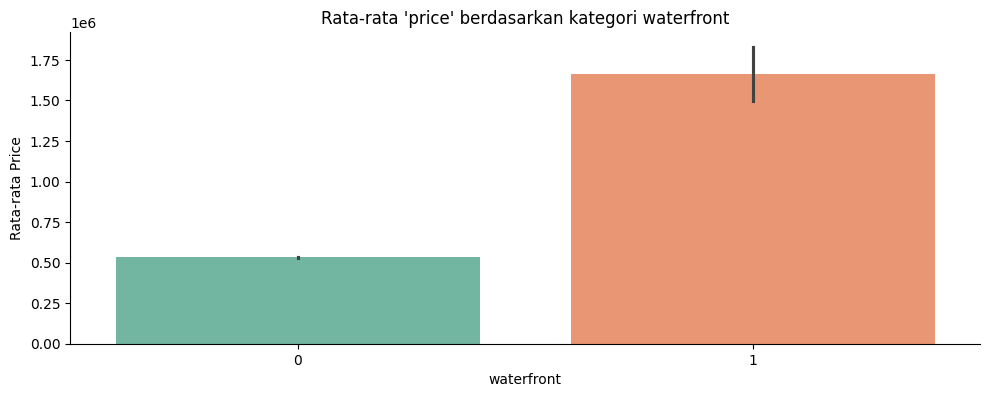

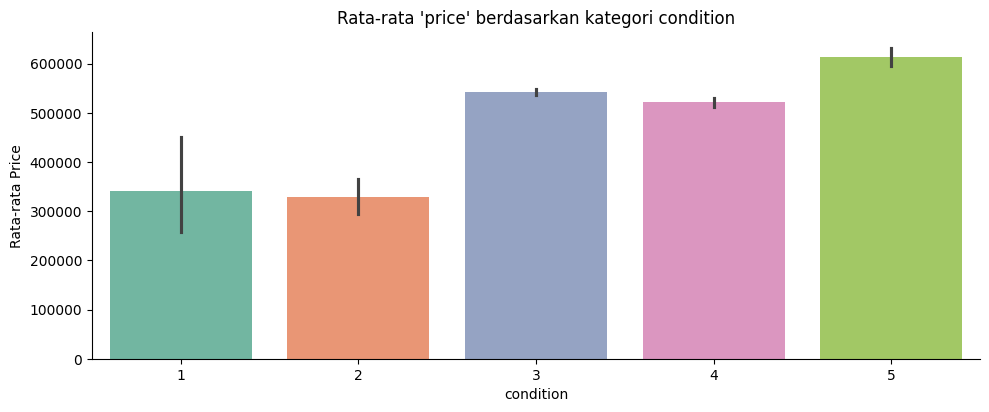

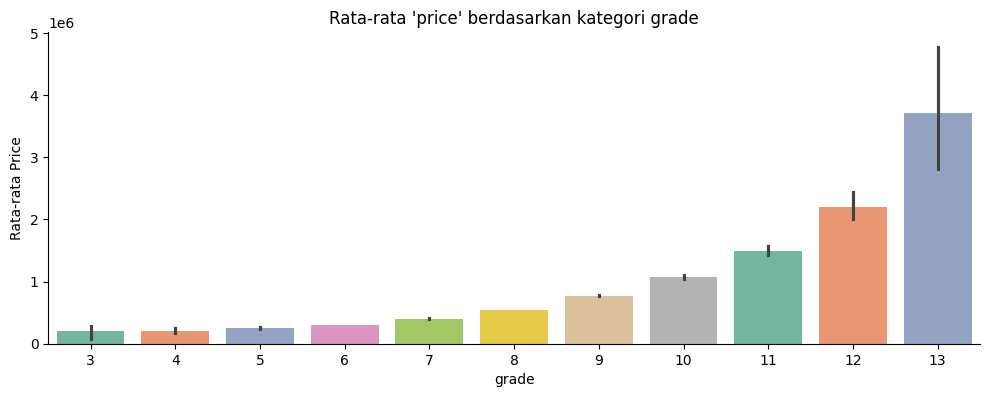

In [26]:
categorical_features = ['waterfront', 'condition', 'grade']

for col in categorical_features:
    sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=2.5,
                data=house_winsorized, palette="Set2")
    plt.title(f"Rata-rata 'price' berdasarkan kategori {col}")
    plt.xlabel(col)
    plt.ylabel("Rata-rata Price")


**Penjelasan**:

- Grafik menunjukkan bahwa rumah yang memiliki waterfront (dekat/punya akses ke air, ditandai dengan 1) memiliki rata-rata harga jauh lebih tinggi dibandingkan rumah yang tidak memiliki waterfront (ditandai dengan 0). Artinya, faktor lokasi terhadap air berpengaruh signifikan terhadap harga properti.

- Semakin tinggi nilai condition, rata-rata harga ikut naik:

  - Condition 1–2: sekitar 330 ribu.

  - Condition 3–4: melonjak ke kisaran 520–540 ribu.

  - Condition 5: tertinggi, ±610 ribu.

    Jadi, kondisi yang lebih baik berasosiasi dengan harga rata-rata yang lebih tinggi, dengan lonjakan paling besar terjadi setelah kategori 2.

- Grafik menunjukkan bahwa semakin tinggi grade, rata-rata harga (price) meningkat tajam:

  - Grade 3–8: harga relatif stabil di bawah 700 ribu.

  - Grade 9–11: mulai naik signifikan, tembus lebih dari 1 juta.

  - Grade 12–13: lonjakan tajam, hingga lebih dari 3 juta di grade 13.

    Kesimpulan: grade berpengaruh kuat terhadap harga, terutama di grade tinggi.

#### Numerical Features

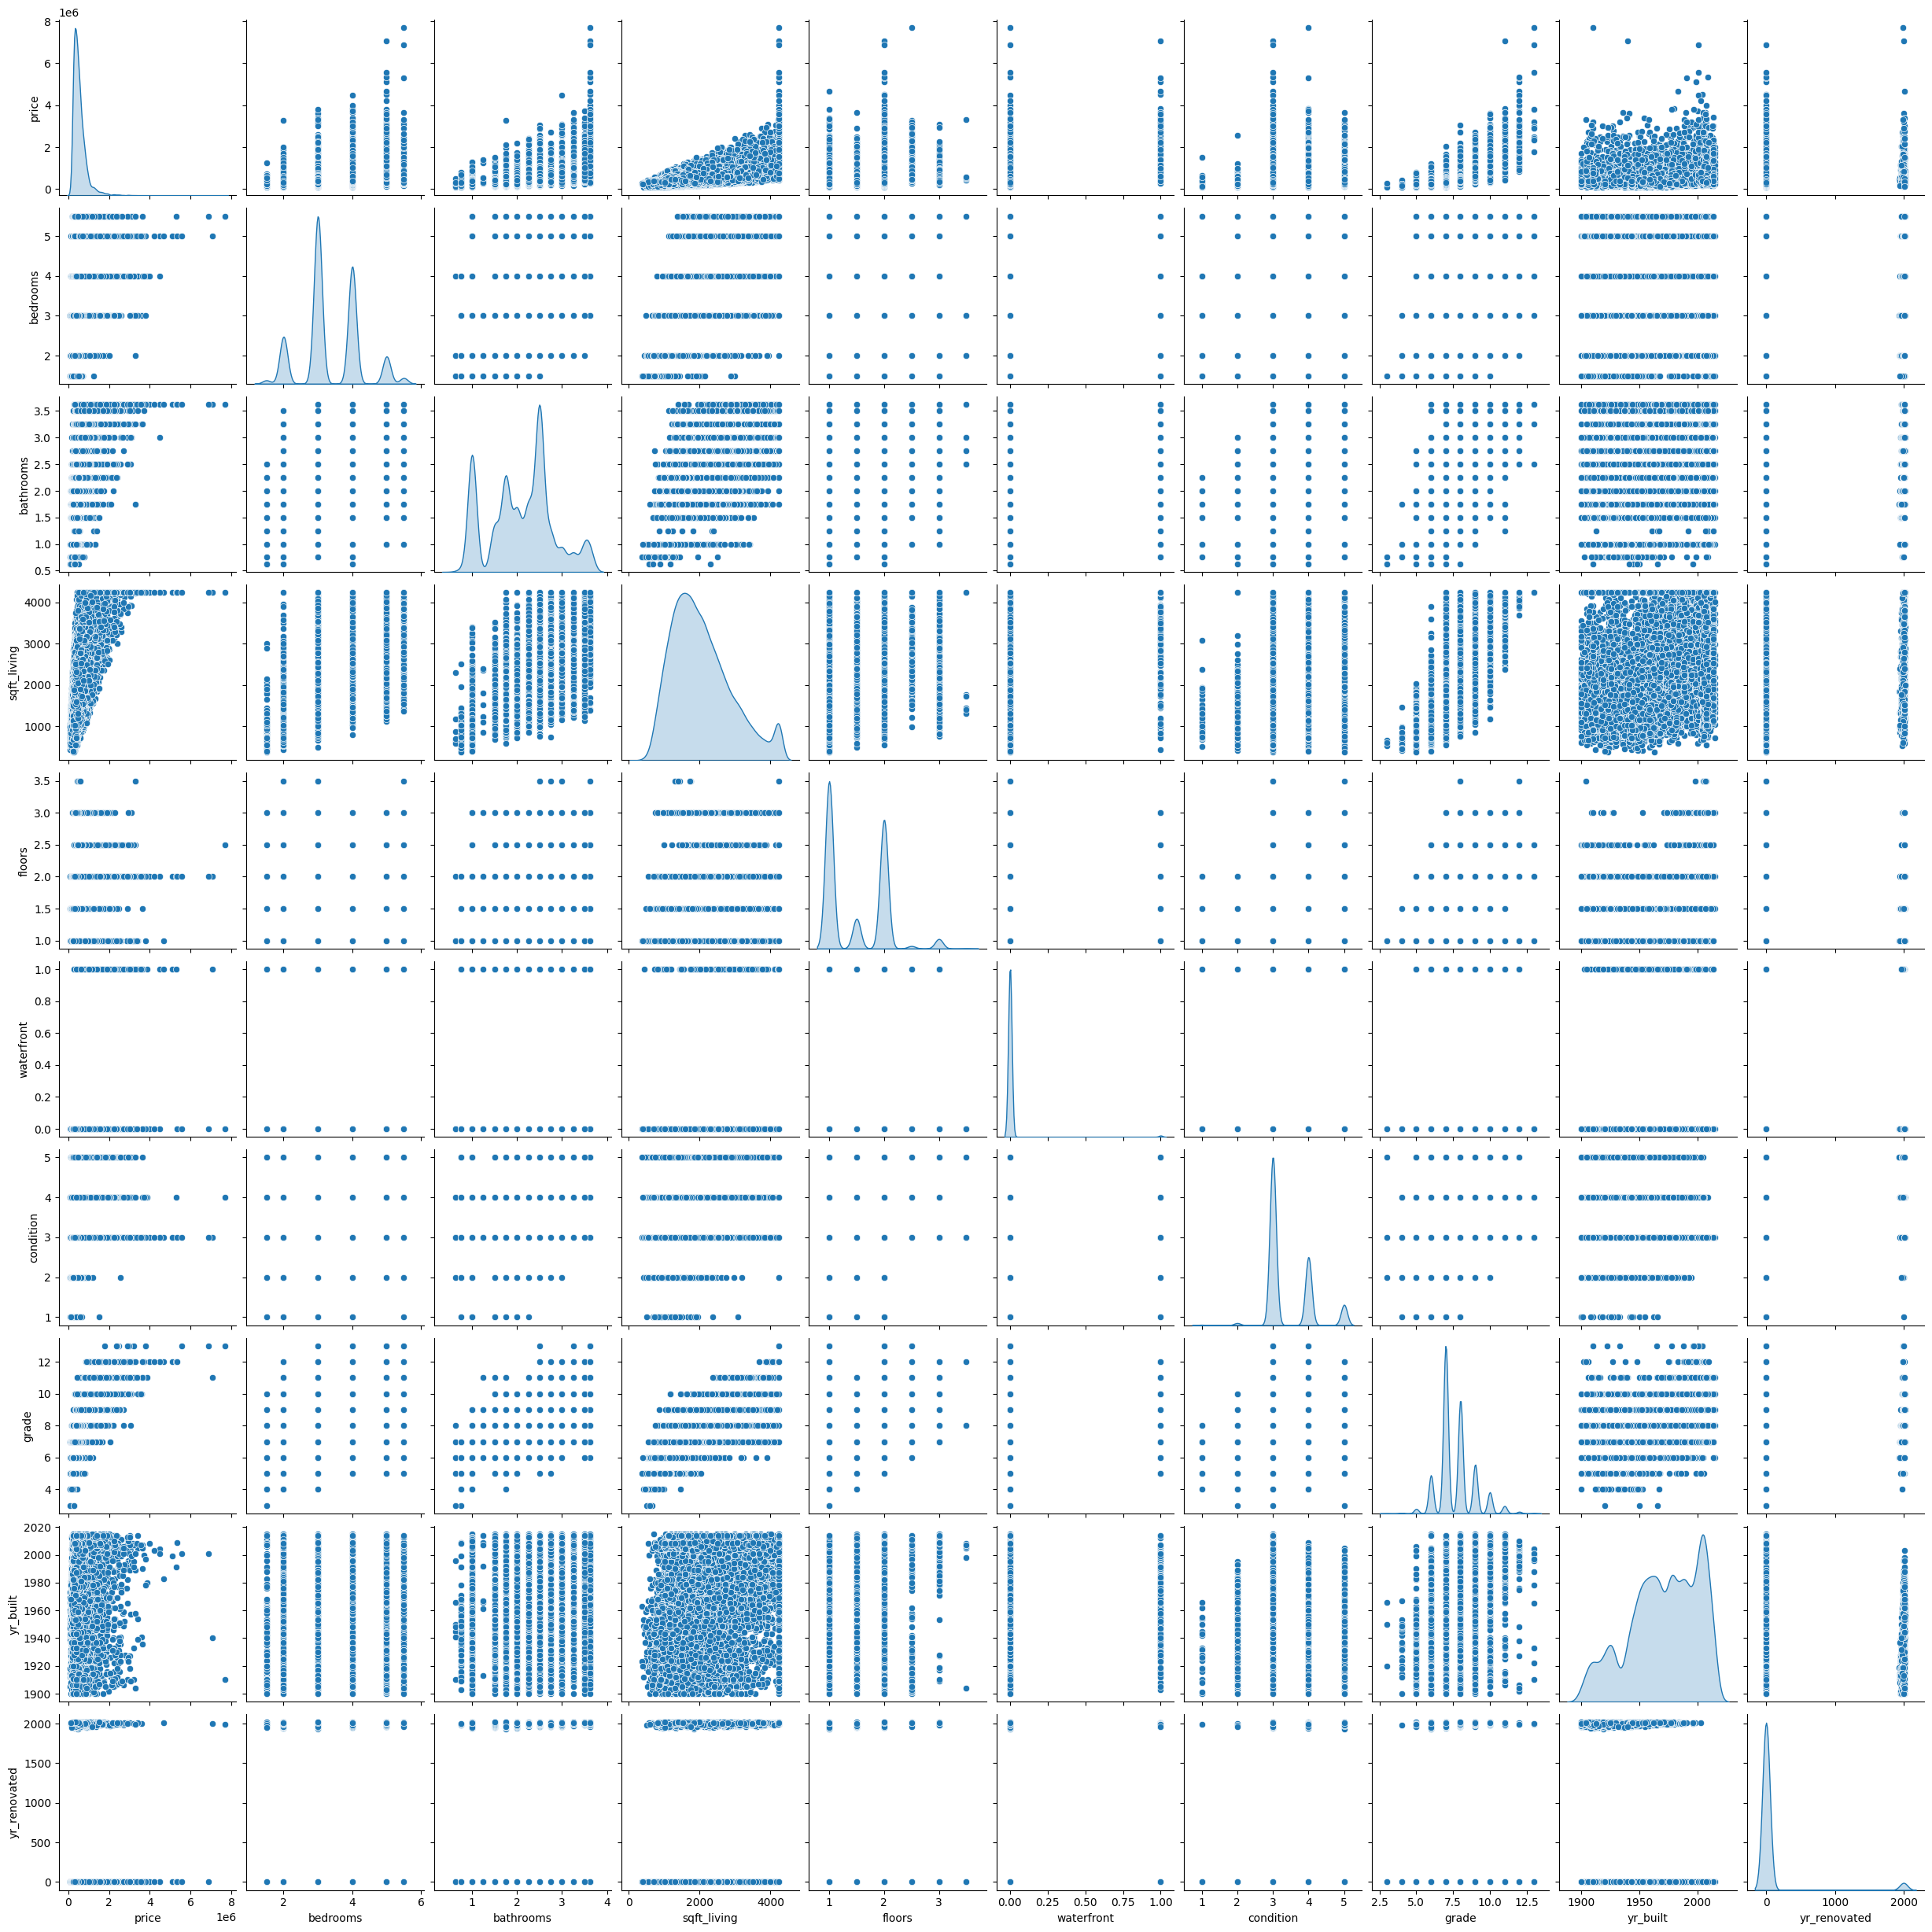

In [27]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(house_winsorized, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

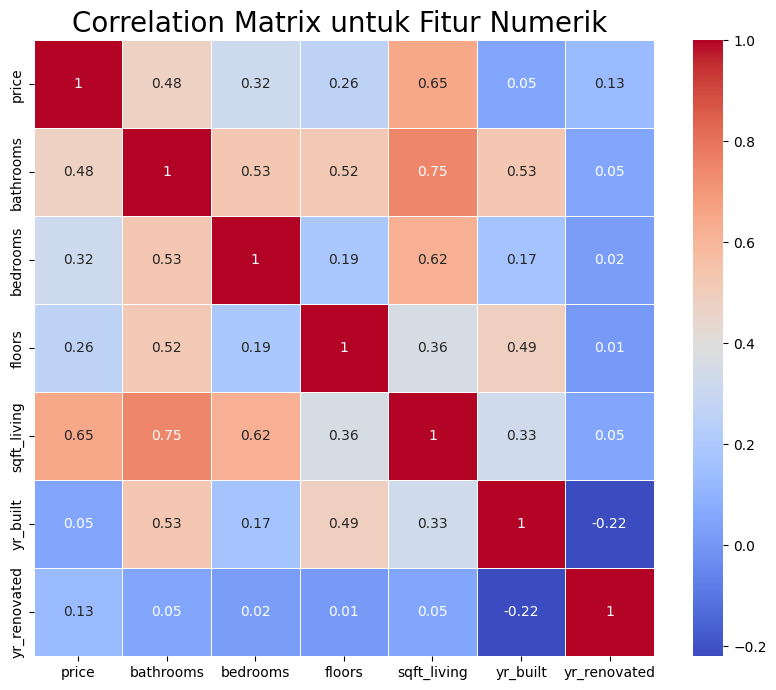

In [28]:
numerical_features = ['price', 'bathrooms', 'bedrooms', 'floors', 'sqft_living', 'yr_built', 'yr_renovated']

plt.figure(figsize=(10, 8))
correlation_matrix = house_winsorized[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

**Penjelasan Matrix Correlation**:

1.  Korelasi terhadap price:
- Tinggi:

  - sqft_living (0.65): Semakin besar luas rumah, semakin tinggi harganya.

  - bathrooms (0.48): Lebih banyak kamar mandi cenderung menaikkan harga.

- Sedang:

  - bedrooms (0.32), floors (0.26)

- Rendah:

  - yr_renovated (0.13)

  - yr_built (0.05): Tahun dibangun hampir tidak berpengaruh langsung terhadap harga.

2. Korelasi antarfungsi lain:
- bathrooms dan sqft_living punya korelasi tinggi (0.75), menunjukkan bahwa rumah lebih besar cenderung memiliki lebih banyak kamar mandi.

- yr_built dan yr_renovated berkorelasi negatif (-0.22), artinya rumah yang lebih lama dibangun cenderung lebih sering direnovasi.

Kesimpulan:

Fitur paling relevan terhadap price adalah sqft_living, lalu bathrooms. Fitur seperti yr_built atau yr_renovated punya pengaruh sangat kecil terhadap harga berdasarkan korelasi linier.



### Menyimpan dataset yang telah dibersihkan ke variabel utama

In [29]:
house = house_winsorized.copy()
house.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
0,221900.0,3.0,1.00,1180.0,1.0,0,3,7,1955,0
1,538000.0,3.0,2.25,2570.0,2.0,0,3,7,1951,1991
2,180000.0,2.0,1.00,770.0,1.0,0,3,6,1933,0
3,604000.0,4.0,3.00,1960.0,1.0,0,5,7,1965,0
4,510000.0,3.0,2.00,1680.0,1.0,0,3,8,1987,0


## Train Test Split

In [30]:
X = house.drop(["price"],axis =1)
y = house["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Split Data:

Training 90 : Test 10



In [31]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 21598
Total # of sample in train dataset: 19438
Total # of sample in test dataset: 2160


## Standarisasi Numeric

In [32]:
scaler = StandardScaler()

numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built','yr_renovated']
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,bedrooms,bathrooms,sqft_living,floors,yr_built,yr_renovated
2053,-0.430140,-1.526276,-0.930050,0.008579,-0.750244,-0.210792
13754,-0.430140,-1.526276,-1.335406,-0.917881,-0.409601,-0.210792
10970,0.742685,0.551480,-0.047806,0.935040,-0.954630,-0.210792
15890,1.915510,1.590357,2.591028,0.935040,0.305750,-0.210792
14117,0.742685,0.551480,0.441005,0.935040,0.748587,-0.210792


In [33]:
X_train[numerical_features].describe().round(4)

,bedrooms,bathrooms,sqft_living,floors,yr_built,yr_renovated
count,19438.0000,19438.0000,19438.0000,19438.0000,19438.0000,19438.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.1894,-2.0457,-2.0150,-0.9179,-2.4194,-0.2108
25%,-0.4301,-0.4874,-0.7512,-0.9179,-0.6821,-0.2108
50%,-0.4301,0.2052,-0.1670,0.0086,0.1354,-0.2108
75%,0.7427,0.5515,0.5841,0.9350,0.8848,-0.2108
max,2.5019,2.1098,2.5910,3.7144,1.4980,4.7912


# Model Deployment

In [34]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])


Analisis Model akan menggunakan tiga jenis model, yaitu:

KNN, RandomForest, Boosting

## KNN

Lazy Learning: Tidak melakukan proses pelatihan dalam arti tradisional. Hanya menyimpan data training.

Prediksi:

1. Untuk setiap titik data baru (X_test), hitung jarak (biasanya Euclidean) ke semua data training.

2. Pilih k tetangga terdekat (dalam contohmu, k=7).

3. Ambil rata-rata dari nilai target (y_train) dari 7 tetangga tersebut.


In [35]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest

Cara kerja:

1. Buat banyak pohon keputusan (di sini 50 pohon).

2. Setiap pohon:

  - Dibuat dari sampel acak dengan pengembalian dari data training (bootstrap sampling).

  - Saat membelah node, hanya subset acak dari fitur yang dipertimbangkan.

3. Setiap pohon membuat prediksi, lalu rata-ratanya diambil (untuk regresi).

Parameter penting:

- n_estimators=50: jumlah pohon dalam hutan.

- max_depth=16: membatasi kedalaman pohon → mencegah overfitting.

- n_jobs=-1: gunakan semua core CPU untuk training (paralel).

In [36]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Metode Adaptive Boosting

Cara kerja (regresi):

1. Model pertama (weak learner) dilatih pada data asli.

2. Residual (kesalahan prediksi) dihitung.

3. Model selanjutnya dilatih untuk memprediksi residual tersebut, bukan nilai aslinya.

4. Proses berulang: setiap model mencoba memperbaiki kesalahan model sebelumnya.

5. Prediksi akhir adalah gabungan (weighted sum) dari semua model.

Spesifik pada kode:

1. AdaBoostRegressor menggunakan DecisionTreeRegressor depth=1 sebagai default weak learner.

2. learning_rate=0.05: mengatur kontribusi tiap model terhadap prediksi akhir.

3. random_state=55: memastikan hasil yang reprodusibel.

In [37]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Scaling Pada Data Uji

Fungsi scaling (normalisasi atau standarisasi) pada data uji (test set) adalah:

- Menjadikan skala data uji konsisten dengan data latih, agar model dapat membuat prediksi yang akurat.

In [38]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-38-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.29361609 -0.47772971 -0.51179405 ...  1.0551657   0.44200754
  1.36174478]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
<ipython-input-38-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.21079196 -0.21079196 -0.21079196 ... -0.21079196 -0.21079196
 -0.21079196]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


# Evaluasi Model

In [39]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,35029023.438781,44108533.120292
RF,13031555.816459,40826373.091298
Boosting,51477538.064462,52359369.499679


✅ Kesimpulan:

- Boosting memiliki generalisasi terbaik (perbedaan train-test kecil).

- Random Forest overfitting parah (akurat di train, tapi test buruk).

- KNN kurang cocok karena overfitting sedang (train cukup bagus, test lumayan bagus).

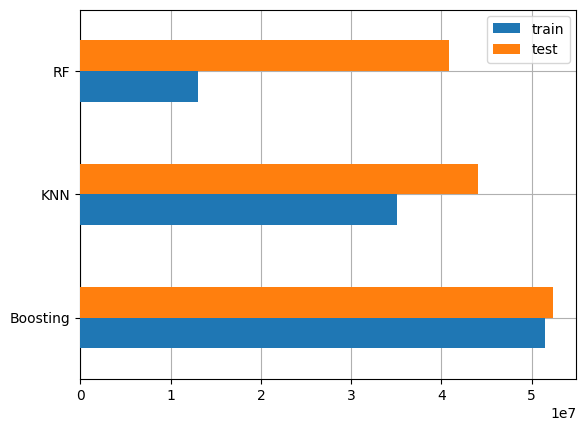

In [40]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

📌 Interpretasi Singkat:

KNN: MSE di data test cukup tinggi, menunjukkan model sedikit overfitting.

RF: MSE Train rendah sedangkan MSE Test sangat tinggi, menunjukkan model sangat overfitting.

Boosting: MSE Train dan Test hampir sama, menunjukkan model yang paling stabil

✅ Kesimpulan:

KNN dan Boosting lebih cocok digunakan dibanding RF untuk data ini.

Boosting mungkin pilihan terbaik karena Model paling stabil.

## Uji Data

In [41]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
21585,270000.0,307818.9,320719.8,383666.0


Evaluasi Akurasi Prediksi:

Hasil Asli = 270000
- KNN	307818.9 	 ->	Paling dekat
- RandomForest	320719.8	 ->	Cukup dekat
- Boosting	383666.0	 ->	Cukup jauh dari aslinya

**Kesimpulan:**

Meskipun Boosting memiliki performa rata-rata paling stabil (dari MSE test sebelumnya), dalam prediksi individual ini, Random Forest adalah model paling akurat, karena menghasilkan prediksi terdekat terhadap nilai asli. Maka, Random Forest bisa diprioritaskan sebagai model final, terutama jika fokusnya adalah akurasi individual.